In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from os import path
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from langdetect import detect
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
swords = set(stopwords.words('english'))
os.chdir('/Users/ginariddle/Desktop/g.school/capstone/')
import math as mt
import scipy.stats as stats
from functions import sample_mean

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

listings = pd.read_pickle('~/Desktop/g.school/data/listings.pickle')
reviews = pd.read_pickle('~/Desktop/g.school/data/reviews.pickle')
hotels = pd.read_pickle('data/hotels.pickle')

## Initial Eda for Hotel Dataset  HOTELS [https://www.kaggle.com/datafiniti/hotel-reviews/home]]

In [6]:
hotels.describe()

,reviews.id,reviews.rating,word_count,sentence_count
count,0.0,34389.000000,34389.000000,34389.000000
mean,NaN,3.722789,46.403705,4.577219
std,NaN,1.326030,40.694963,4.369674
min,NaN,0.000000,1.000000,0.000000
25%,NaN,3.000000,18.000000,2.000000
50%,NaN,4.000000,40.000000,4.000000
75%,NaN,5.000000,61.000000,6.000000
max,NaN,5.000000,717.000000,367.000000


In [7]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34389 entries, 0 to 35777
Data columns (total 15 columns):
city                    34389 non-null object
name                    34389 non-null object
reviews.date            34132 non-null object
reviews.dateAdded       34389 non-null object
reviews.id              0 non-null float64
reviews.rating          34389 non-null float64
reviews.text            34389 non-null object
reviews.title           33585 non-null object
reviews.userCity        15762 non-null object
reviews.username        34363 non-null object
reviews.userProvince    17020 non-null object
language                34389 non-null object
word_count              34389 non-null int64
sentence_count          34389 non-null int64
clean_text              34389 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 4.2+ MB


In [8]:
hotels.isna().sum()

city                        0
name                        0
reviews.date              257
reviews.dateAdded           0
reviews.id              34389
reviews.rating              0
reviews.text                0
reviews.title             804
reviews.userCity        18627
reviews.username           26
reviews.userProvince    17369
language                    0
word_count                  0
sentence_count              0
clean_text                  0
dtype: int64

## Plotting High-Lvl Hotel Data

In [9]:
top_users = hotels['reviews.username'].value_counts().head(10)
top_hotels = hotels['name'].value_counts(ascending=False).head(10)
top_hotels
review_count = len(hotels)


x_labels = top_users.index.tolist()
x_values = [i for i in range(len(x_labels))]
y = top_users.values.tolist()
x_labels_hotels = top_hotels.index.tolist()
x_values_hotels = [i for i in range(len(x_labels))]
y_hotels = top_hotels.values.tolist()

review_distribution = hotels['reviews.rating'].value_counts().head(6)[::-1]
x_labels_reviews = review_distribution.index.tolist()
x_values_reviews = [i for i in range(len(x_labels_reviews))]
y_reviews = review_distribution.values.tolist()

top_languages = hotels['language'].value_counts().head(5)
x_labels_lang = top_languages.index.tolist()
x_values_lang = [i for i in range(len(x_labels_lang))]
y_lang = top_languages.values.tolist()

word_count = hotels['word_count'].value_counts()
x_labels_wordc = word_count.index.tolist()
x_values_wordc = [i for i in range(min(x_labels_wordc),max(x_labels_wordc))]
y_wordc = word_count.values.tolist()

city_count = hotels['city'].value_counts().head(15)
x_labels_city = city_count.index.tolist()
x_values_city = [i for i in range(len(x_labels_city))]
y_city = city_count.values.tolist()

usercity_count = hotels['reviews.userCity'].value_counts().head(15)
x_labels_usercity = usercity_count.index.tolist()
x_values_usercity = [i for i in range(len(x_labels_usercity))]
y_usercity = usercity_count.values.tolist()

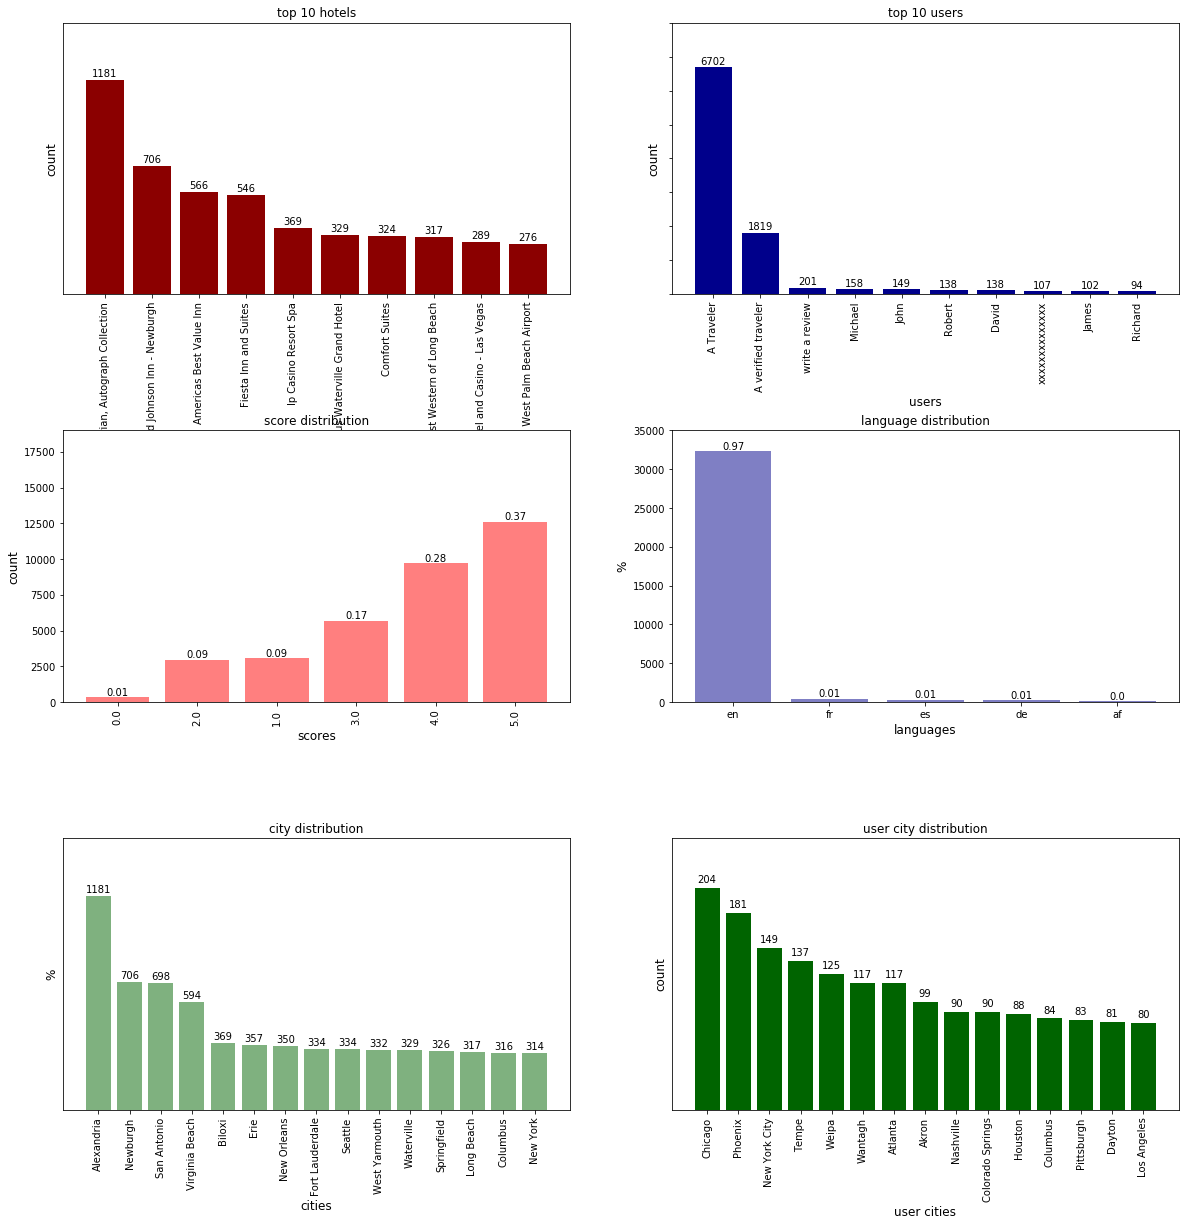

In [10]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

ax[0,1].bar(x_values,y,align='center',color='darkblue')
ax[0,1].set_ylim(0,8000)
ax[0,1].set_ylabel('count',size=12)
ax[0,1].set_xlabel('users',size=12)
ax[0,1].set_title('top 10 users')
ax[0,1].set_yticklabels([])
ax[0,1].set_xticks(x_values)
ax[0,1].set_xticklabels(x_labels,rotation='vertical')
for i,v in enumerate(y):
    ax[0,1].text(i,v+80,f'{v}',horizontalalignment='center',)

ax[0,0].bar(x_values_hotels,y_hotels,align='center',color='darkred')
ax[0,0].set_ylim(0,1500)
ax[0,0].set_ylabel('count',size=12)
ax[0,0].set_xlabel('hotels',size=12)
ax[0,0].set_title('top 10 hotels')
ax[0,0].set_yticks([])
ax[0,0].set_xticks(x_values)
ax[0,0].set_xticklabels(x_labels_hotels,rotation='vertical')
for i,v in enumerate(y_hotels):
    ax[0,0].text(i,v+20,f'{v}',horizontalalignment='center',)

ax[1,0].bar(x_values_reviews,y_reviews,align='center',color='red',alpha=.5)
ax[1,0].set_ylim(0,19000)
ax[1,0].set_ylabel('count',size=12)
ax[1,0].set_xlabel('scores',size=12)
ax[1,0].set_title('score distribution')
ax[1,0].set_xticks(x_values_reviews)
ax[1,0].set_xticklabels(x_labels_reviews,rotation='vertical')
for i,v in enumerate(y_reviews):
    ax[1,0].text(i,v+130,f'{round(v/sum(y_reviews),2)}',horizontalalignment='center',)


ax[1,1].bar(x_values_lang,y_lang,align='center',color='darkblue',alpha=.5)
ax[1,1].set_ylim(0,35000)
ax[1,1].set_ylabel('%',size=12)
ax[1,1].set_xlabel('languages',size=12)
ax[1,1].set_title('language distribution')
ax[1,1].set_xticks(x_values_lang)
ax[1,1].set_xticklabels(x_labels_lang,rotation='horizontal')
for i,v in enumerate(y_lang):
    ax[1,1].text(i,v+250,f'{round(v/sum(y_lang),2)}',horizontalalignment='center',)



ax[2,0].bar(x_labels_city,y_city,color='darkgreen',alpha=.5)
ax[2,0].set_ylim(0,1500)
ax[2,0].set_ylabel('%',size=12)
ax[2,0].set_xlabel('cities',size=12)
ax[2,0].set_title('city distribution')
ax[2,0].set_yticks([])
ax[2,0].set_xticks(x_values_city)
ax[2,0].set_xticklabels(x_labels_city,rotation='vertical')
for i,v in enumerate(y_city):
    ax[2,0].text(i,v+20,f'{v}',horizontalalignment='center')
    

ax[2,1].bar(x_labels_usercity,y_usercity,color='darkgreen')
ax[2,1].set_ylabel('count',size=12)
ax[2,1].set_xlabel('user cities',size=12)
ax[2,1].set_title('user city distribution')
ax[2,1].set_ylim(0,250)
ax[2,1].set_yticks([])
ax[2,1].set_xticks(x_values_usercity)
ax[2,1].set_xticklabels(x_labels_usercity,rotation='vertical')
for i,v in enumerate(y_usercity):
    ax[2,1].text(i,v+5,f'{v}',horizontalalignment='center')
    
plt.show()

Text(0.5, 1.0, 'Score/Frequency Ratios')

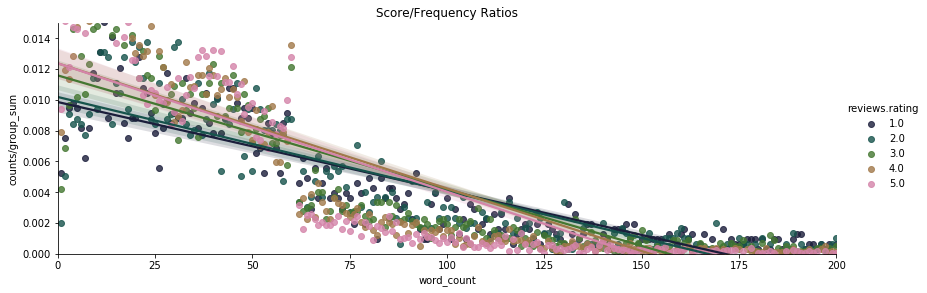

In [11]:
df_wordcount = hotels.groupby(['word_count','reviews.rating'])['reviews.text'].agg('count').reset_index()
df_wordcount.columns = ['word_count', 'reviews.rating', 'counts']
rating_sums = df_wordcount.groupby('reviews.rating')['counts'].sum()
df_wordcount = df_wordcount.merge(rating_sums,how='inner',on='reviews.rating')
df_wordcount.columns = ['word_count', 'reviews.rating', 'counts_x', 'rating_group_sum']
df_wordcount['counts/group_sum'] = df_wordcount['counts_x']/df_wordcount['rating_group_sum']
df_wordcount = df_wordcount[df_wordcount['word_count']<=200]
df_wordcount = df_wordcount[df_wordcount['counts/group_sum']<= .03]
df_wordcount = df_wordcount[df_wordcount['reviews.rating'] != 0 ]

sns.lmplot(data=df_wordcount,x='word_count',
           y='counts/group_sum',
           hue='reviews.rating',
           palette=sns.color_palette("cubehelix", 7),
           size=4,
           height=3,
           aspect=3,
           legend_out=True)
plt.ylim(0,.015)
plt.xlim(0,200)
plt.title('Score/Frequency Ratios')


### HOTEL EDA OVERVIEW:
1. Created subplots of 6 graphs to provide overall picture of the Hotels data.
2. Added Language col. in order to detect all english reviews for later analysis. 96% of all reviews turned out to be English.
3. Discovered that hotels are not primarily from the largest cities. In fact the city with the most reviews is Alexandria followed by Newburgh. This makes clear that the distribution of reviews across American cities does not match the distribution of population across cities. This could be a potential form of bias. 
4. Scores seem to have an expected distribution with approx. 40% of scores being 4-5, 30% 3-4, 20% 2-3 and so on. 
5. Discoverd that 17% of data seems to have been created by anonymous user, potentially assigned to guest accounts, people without usernames. It may be helpful to look further into this to be sure.
6. Users are mostly from the USA and come from what seems to be a more evenly distributed population that aligns more with what one would expect, namely that the top 10 user cities are larger American cities. 
7. Removed all reviews that had no words.

8. Removed all stop-words from text and created a second text column with cleaned reviews. 
9. Counted Words per review and sentences per review for future text analysis
10. Using the two new words and sentence review, created simple regression to look at the relation between word count and review score
   - appears that perfect scores tend to be shorter and more to the point whereby as scores decrease there exists a natural trend for reviews to become longer. This is apparent by the crossing of the lines of best fit in the regression above.
   

### Causes for concern:
- The distribution of cities where each hotel is located. This may be underrepresenting the true population of American hotels
- There were some anomalies in the word count data. Specifically around text with exactly 61 words. For whatever reason, 16% of the reviews have exactly 61 words in comparison to the next most significant word count (16) which represents just 2% of the review population. No need for a hypothesis test here... event is extremely rare and has a sub .001 p value easy. 

## Initial Eda for Airbnb Dataset   [http://insideairbnb.com/]

### Narrowed Search Process
1. Airbnb data is split up by city. Chose Portland based on its size (not too big or too small) and based on the availability of consistently scraped data starting back in 2015 (the earliest records of scraped airbnb data through insideairbnb). 
2. Removed all unnecessary columns for the sake of analysis including reviews with no text.
3. Due to the nature of the data being split by scrape date, the full data file needed flattening into one dataset with a level of detail of the listing. This required aggregation of multiple rows in which case the MEAN was used as the representative metric for any given observations features. 
4. Used the 'first review' date for an enrollment date and 'last scraped' date for churns from the platform. With these dates created age_year column and age_day column for each listing.
5. Took same approach to do EDA as was taken with Hotel dataset. Created 6 subplots for displaying data patterns.
6. Approx 50% of airbnb listings are homes, 25% apartments, 7% guest suites.
7. Airbnb Accumulated roughly 7000 new listings from 2016 to the end of 18. Of these 7000, aprox. 3000 were active by the end of 17.
8. Approx. 58% of listings at the end of 2018 were less than 2 years old. 
9. 2 and 4 person homes are the most popular and represent 44% and 22% of all listings in Portland.
10. Regplot shows an apparent correlation between both accommodates (number of guests) and years active and a higher score. This, as shown by the linear regaression line, is shown to be false merely appears to exist. There is however no correlation as indicated by the linesof best fit with slope of 0.

### Causes for concern:
- The data only focuses on one geography. Ideally the data would represent a less biased pop. proportion.
- Portland is a city with a strong culture which could have adverse effects on the outcome due to it's patterns not matching regular review, scoring patterns
- There is uncertainty as to how airbnb calculates their 100 point score / listing. I reduce the 100 point score to 5points simply by dividing it by 20.

In [12]:
listings_eda = listings[['id',
       'host_total_listings_count', 'property_type', 'accommodates',
       'bedrooms', 'beds','weekly_price', 'monthly_price', 'maximum_nights',
       'calendar_last_scraped', 'first_review','review_scores_rating']]
id_last_date = listings_eda[['id','calendar_last_scraped']]
id_last_date = id_last_date.groupby('id')['calendar_last_scraped'].max()
listings_eda = listings_eda.groupby(['id','property_type','first_review'])['accommodates',
                                            'bedrooms',
                                            'beds',
                                            'weekly_price',
                                            'monthly_price',
                                            'maximum_nights',
                                            'review_scores_rating'].agg('mean').reset_index()
listings_eda = listings_eda.merge(id_last_date,how='left',on='id')
listings_eda['calendar_last_scraped'] = pd.to_datetime(listings_eda['calendar_last_scraped'])
listings_eda['first_review'] = pd.to_datetime(listings_eda['first_review'])
listings_eda['days_old'] = listings_eda['calendar_last_scraped']-listings_eda['first_review']
listings_eda['years_old'] = listings_eda['days_old'].div(pd.Timedelta(365,'D')).astype(int)

property_type = listings_eda.groupby(['property_type'])['id'].count().sort_values(ascending=False).head(7)
x_labels_property = property_type.index
x_values_property = [i for i in range(len(x_labels_property))]
y_property = property_type.values

listings_age = listings_eda['years_old'].astype(int).value_counts()
x_labels_age = listings_age.index
x_values_age = [i for i in range(len(x_labels_age))]
y_age = listings_age.values

listings_accommodates = listings_eda['accommodates'].astype(int).value_counts().sort_index()
x_labels_accommodates = listings_accommodates.index
x_values_accommodates = [i for i in range(len(x_labels_accommodates))]
y_accommodates = listings_accommodates.values

airbnb_length = listings_eda.shape[0]

In [13]:
resignation_year = listings_eda['calendar_last_scraped'].dt.year
resignation_quarter = listings_eda['calendar_last_scraped'].dt.quarter

enrollment_year = listings_eda['first_review'].dt.year
enrollment_quarter = listings_eda['first_review'].dt.quarter

last_scraped = pd.concat([resignation_year,resignation_quarter],axis=1)
enrolled = pd.concat([enrollment_year,enrollment_quarter],axis=1)
last_scraped.columns= ['year','quarter']
enrolled.columns = ['year','quarter']

listings_eda['enrollment_year'] = enrollment_year
listings_eda['enrollment_quarter'] = enrollment_quarter
listings_eda['resignation_year'] = resignation_year
listings_eda['resignation_quarter'] = resignation_quarter

In [14]:
enrollments = listings_eda.groupby(['enrollment_year','enrollment_quarter'])['id'].count().reset_index()
resignations = listings_eda.groupby(['resignation_year','resignation_quarter'])['id'].count().reset_index()
enrollments = enrollments.query('enrollment_year > 2015').query('enrollment_year < 2019').reset_index().drop(labels='index',axis=1)
resignations = resignations.query('resignation_year > 2015').query('resignation_year < 2019').reset_index().drop(labels='index',axis=1)
enrollments.columns = ['year','quarter','count']
resignations.columns = ['year','quarter','count']

net_growth = enrollments['count'].cumsum()-resignations['count'].cumsum()
growth = pd.concat([enrollments['year'],enrollments['quarter'],enrollments['count'].cumsum(),resignations['count'].cumsum(),net_growth],axis=1)
quarter = {1:1,2:4,3:7,4:10}

growth.columns = ['year','quarter','enrollments','resignations','net_growth']
growth_stacked = growth.set_index(['year','quarter']).stack().reset_index()
growth_stacked.columns = ['year','quarter','type','count']
growth_stacked.insert(0,'id',growth_stacked['year'].astype(str)+':'+growth_stacked['quarter'].astype(str))
growth_stacked = growth_stacked.reset_index()
#pd.Timestamp(year=2012, month=quarter[4] ,day=1)
growth.insert(0,'id',growth['year'].astype(str)+':'+growth['quarter'].astype(str))

In [15]:
def axisfunc(i):
    if i == 1:
        return 1
    else:
        if i%4==0:
            return 1
        else:
            return 0

In [16]:
index = [axisfunc(i) for i in range(1,growth_stacked.shape[0]+1)]
x_labels = growth_stacked['id']*index

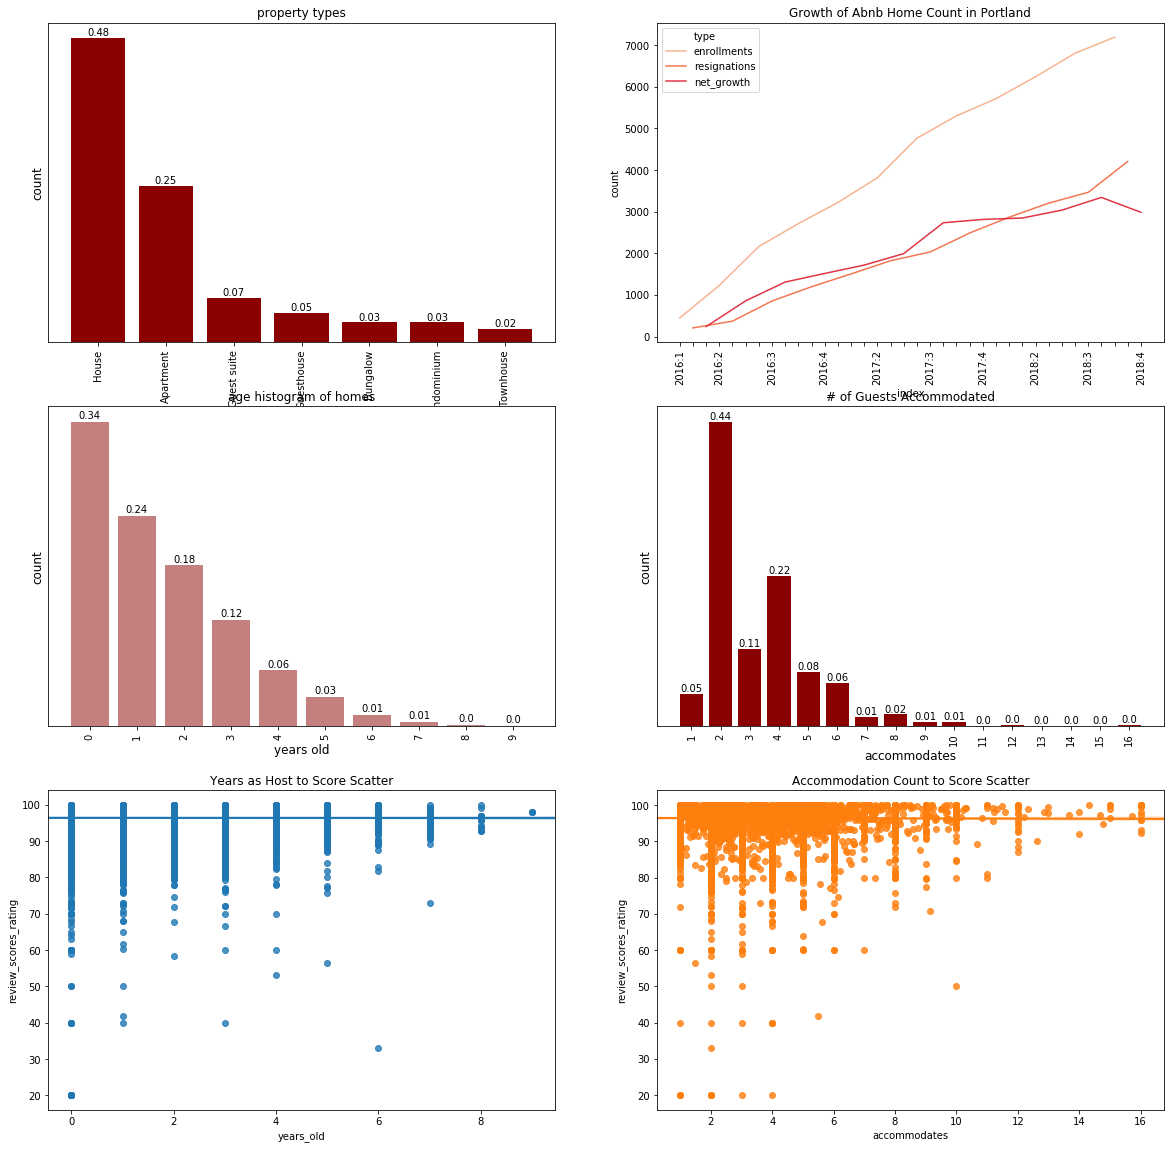

In [17]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
ax[0,0].bar(x_values_property,y_property,align='center',color='darkred')
#ax[0,0].set_ylim(0,1500)
ax[0,0].set_ylabel('count',size=12)
ax[0,0].set_xlabel('properties',size=12)
ax[0,0].set_title('property types')
ax[0,0].set_yticks([])
ax[0,0].set_xticks(x_values_property)
ax[0,0].set_xticklabels(x_labels_property,rotation='vertical')
for i,v in enumerate(y_property):
    ax[0,0].text(i,v+40,f'{round(v/airbnb_length,2)}',horizontalalignment='center',)
    

ax[1,0].bar(x_values_age,y_age,align='center',color='darkred',alpha=.5)
#ax[1,0].set_ylim(0,1500)
ax[1,0].set_ylabel('count',size=12)
ax[1,0].set_xlabel('years old',size=12)
ax[1,0].set_title('age histogram of homes')
ax[1,0].set_yticks([])
ax[1,0].set_xticks(x_values_age)
ax[1,0].set_xticklabels(x_labels_age,rotation='vertical')
for i,v in enumerate(y_age):
    ax[1,0].text(i,v+40,f'{round(v/airbnb_length,2)}',horizontalalignment='center',)

    
palette = dict(zip(growth_stacked.type.unique(),
                   sns.color_palette("rocket_r", 6)))
sns.lineplot(x='index', y='count',hue='type',data=growth_stacked,ax=ax[0,1],palette=palette)
ax[0,1].set_xticklabels(x_labels,rotation='vertical')
ax[0,1].set_xticks(growth_stacked.index)
ax[0,1].set_title('Growth of Abnb Home Count in Portland')

ax[1,1].bar(x_values_accommodates,y_accommodates,align='center',color='darkred',alpha=1)
ax[1,1].set_ylabel('count',size=12)
ax[1,1].set_xlabel('accommodates',size=12)
ax[1,1].set_title('# of Guests Accommodated')
ax[1,1].set_yticks([])
ax[1,1].set_xticks(x_values_accommodates)
ax[1,1].set_xticklabels(x_labels_accommodates,rotation='vertical')
for i,v in enumerate(y_accommodates):
    ax[1,1].text(i,v+40,f'{round(v/airbnb_length,2)}',horizontalalignment='center',)

hm1 = listings_eda[['years_old','property_type','review_scores_rating']].dropna()
sns.regplot(data=hm1,x='years_old',y='review_scores_rating',ax=ax[2,0]) 
ax[2,0].set_title('Years as Host to Score Scatter')

df2 = listings_eda[['review_scores_rating','accommodates']].dropna()
sns.regplot(data=df2,x='accommodates',y='review_scores_rating',ax=ax[2,1])
ax[2,1].set_title('Accommodation Count to Score Scatter')

plt.show()



## Hotels Avg. Housing Scores

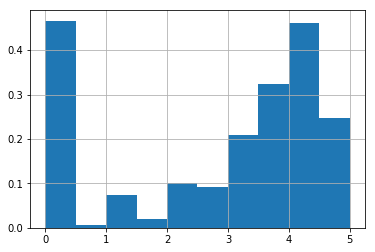

In [42]:
hotels_test = hotels.groupby(['name','city','reviews.rating'])['word_count'].agg('count').reset_index()
hotels_test.columns = ['name', 'city', 'reviews.rating', 'hotel_count_per_rating']
hotels_test['id'] = hotels_test['name'] +': '+ hotels_test['city']
hotels_test = hotels_test[['id','name', 'city', 'reviews.rating', 'hotel_count_per_rating']]
hotels_test['rating_x_count'] = hotels_test['reviews.rating'] *hotels_test['hotel_count_per_rating']
hotels_test = hotels_test.groupby(['id','name','city'])['rating_x_count','hotel_count_per_rating'].sum().reset_index()
hotels_test['rating_avg'] = hotels_test['rating_x_count'] / hotels_test['hotel_count_per_rating']
hotels_test_sample = hotels_test['rating_avg']
hotels_test_sample.hist(density=True)
total = sum(hotels_test_sample.value_counts().values)
x = hotels_test_sample.value_counts().index
y = hotels_test_sample.value_counts().values/total

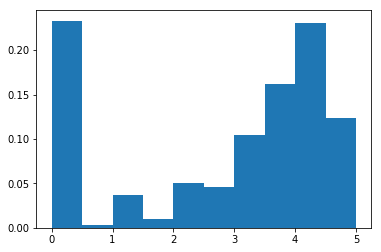

In [30]:
weights_hotels = np.ones_like(hotels_test_sample)/float(len(hotels_test_sample))
plt.hist(hotels_test_sample, weights=weights_hotels)
plt.show()

In [31]:
hotels_test_sample.eq(0).sum()

204

city                    34389
name                    34389
reviews.date            34132
reviews.dateAdded       34389
reviews.id                  0
reviews.rating          34389
reviews.text            34389
reviews.title           33585
reviews.userCity        15762
reviews.username        34363
reviews.userProvince    17020
language                34389
word_count              34389
sentence_count          34389
clean_text              34389
dtype: int64

## Airbnb Avg. Housing Score

In [43]:
airbnbs = listings[['id','host_since','host_total_listings_count','property_type', 'first_review','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]
airbnbs['combined_score'] = airbnbs['review_scores_accuracy']+airbnbs['review_scores_cleanliness']\
                                 +airbnbs['review_scores_checkin']\
                                 +airbnbs['review_scores_communication']\
                                 +airbnbs['review_scores_location']\
                                 +airbnbs['review_scores_value']

airbnbs['review_scores_rating'] = airbnbs['review_scores_rating']/20
airbnbs['combined_score'] = airbnbs['combined_score']/12
airbnbs['review_scores_accuracy'] = airbnbs['review_scores_accuracy']/2
airbnbs['review_scores_cleanliness'] = airbnbs['review_scores_cleanliness']/2
airbnbs['review_scores_checkin'] = airbnbs['review_scores_checkin']/2
airbnbs['review_scores_communication'] = airbnbs['review_scores_communication']/2
airbnbs['review_scores_location'] = airbnbs['review_scores_location']/2
airbnbs['review_scores_value'] = airbnbs['review_scores_value']/2

airbnb_test = airbnbs.groupby(['id','property_type'])['review_scores_rating',
                                                      'review_scores_accuracy',
                                                      'review_scores_cleanliness',
                                                      'review_scores_checkin',
                                                      'review_scores_communication',
                                                      'review_scores_location',
                                                      'review_scores_value',
                                                      'combined_score'].mean().dropna().reset_index()

airbnb_test_sample = airbnb_test['review_scores_rating']
airbnb_test_combined = airbnb_test['combined_score']
airbnb_test_accuracy = airbnb_test['review_scores_accuracy']
airbnb_test_cleanliness = airbnb_test['review_scores_cleanliness']
airbnb_test_checkin = airbnb_test['review_scores_checkin']
airbnb_test_communication = airbnb_test['review_scores_communication']
airbnb_test_location = airbnb_test['review_scores_location']
airbnb_test_value = airbnb_test['review_scores_value']

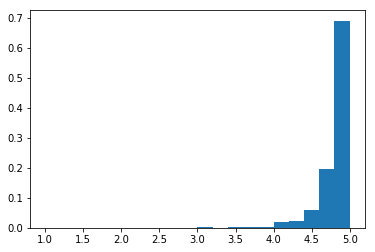

In [44]:
weights_abnb = np.ones_like(airbnb_test_sample)/float(len(airbnb_test_sample))
weights_combined = np.ones_like(airbnb_test_combined)/float(len(airbnb_test_combined))
weights_accuracy = np.ones_like(airbnb_test_accuracy)/float(len(airbnb_test_accuracy))
weights_cleanliness = np.ones_like(airbnb_test_cleanliness)/float(len(airbnb_test_cleanliness))
weights_checkin = np.ones_like(airbnb_test_checkin)/float(len(airbnb_test_checkin))
weights_communication = np.ones_like(airbnb_test_communication)/float(len(airbnb_test_communication))
weights_location = np.ones_like(airbnb_test_location)/float(len(airbnb_test_location))
weights_value = np.ones_like(airbnb_test_value)/float(len(airbnb_test_value))
plt.hist(airbnb_test_sample, weights=weights_abnb,bins=20)
plt.show()

### Combining Normalized Scoring Distribution for Housing and Airbnb for high level comparison
- As Airbnb as technically 7 different scores, decided to create plot for most relevant 6 including overall, a combined score for the remaining 7 and 4 individual scores
- Of the four niche scores, the score for value seems to have the widest distribution and thus variance from the mean Airbnb score. I therefore decide to use the overall and the value scores for hypothesis testing. 

(3, 5)

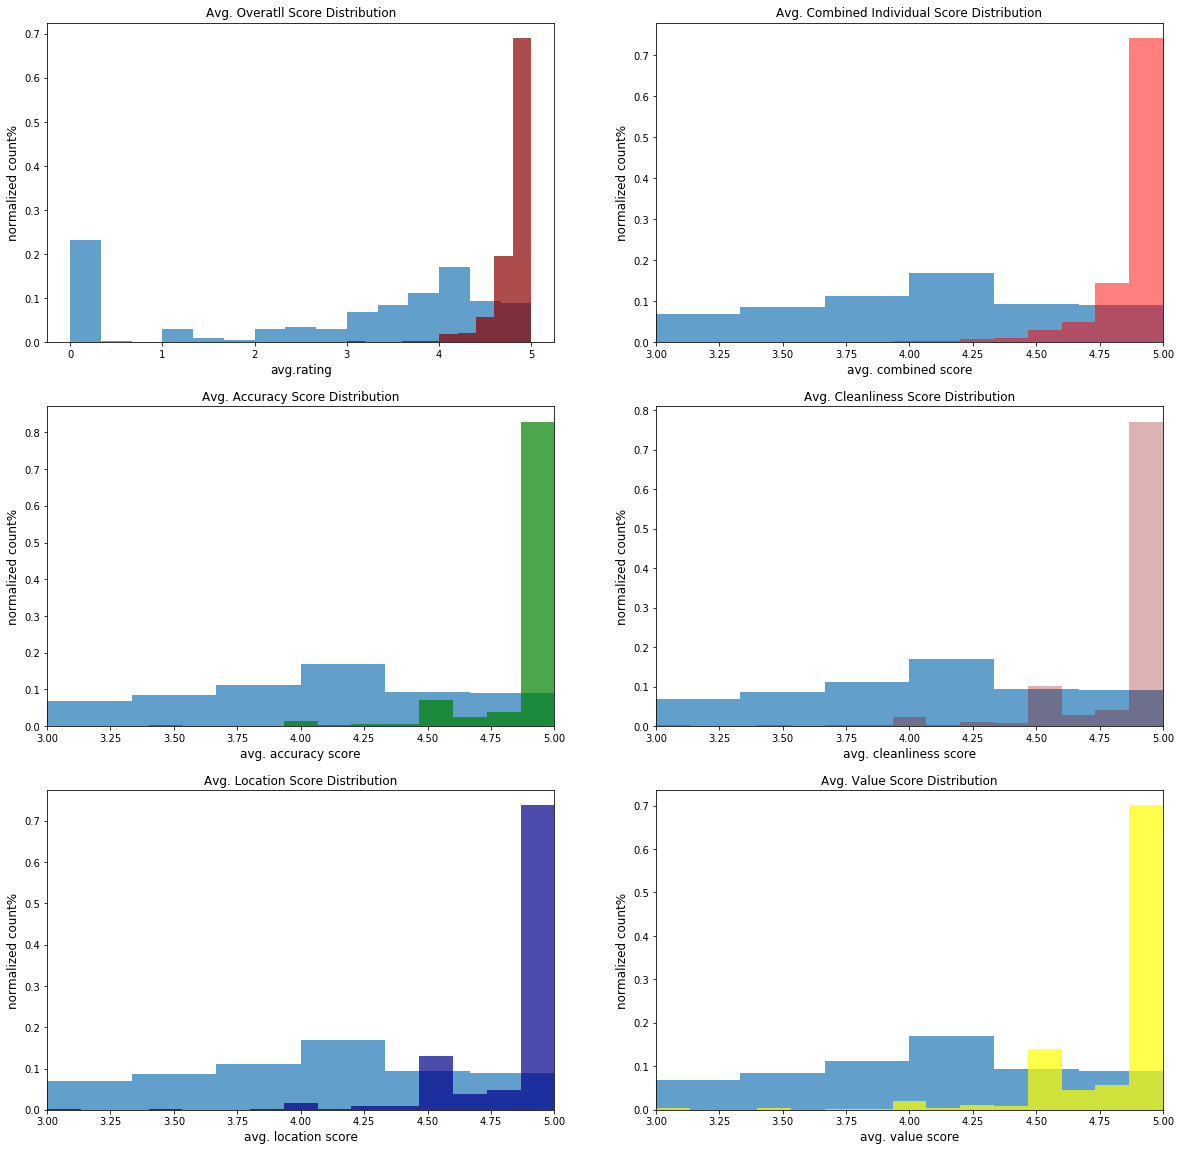

In [45]:
fig,ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].hist(hotels_test_sample, weights=weights_hotels,bins=15,alpha=.7)
ax[0,0].hist(airbnb_test_sample, weights=weights_abnb,bins=20,alpha=.7,color='darkred')
ax[0,0].set_ylabel('normalized count%',size=12)
ax[0,0].set_xlabel('avg.rating',size=12)
ax[0,0].set_title('Avg. Overatll Score Distribution')

ax[0,1].hist(hotels_test_sample, weights=weights_hotels,bins=15,alpha=.7)
ax[0,1].hist(airbnb_test_combined, weights=weights_combined,bins=30,alpha=.5,color='red')
ax[0,1].set_ylabel('normalized count%',size=12)
ax[0,1].set_xlabel('avg. combined score',size=12)
ax[0,1].set_title('Avg. Combined Individual Score Distribution')
ax[0,1].set_xlim(3,5)

ax[1,0].hist(hotels_test_sample, weights=weights_hotels,bins=15,alpha=.7)
ax[1,0].hist(airbnb_test_accuracy, weights=weights_accuracy,bins=30,
             alpha=.7,color='green')
ax[1,0].set_ylabel('normalized count%',size=12)
ax[1,0].set_xlabel('avg. accuracy score',size=12)
ax[1,0].set_title('Avg. Accuracy Score Distribution')
ax[1,0].set_xlim(3,5)

ax[1,1].hist(hotels_test_sample, weights=weights_hotels,bins=15,alpha=.7)
ax[1,1].hist(airbnb_test_cleanliness, weights=weights_cleanliness,bins=30,alpha=.3,color='darkred')
ax[1,1].set_ylabel('normalized count%',size=12)
ax[1,1].set_xlabel('avg. cleanliness score',size=12)
ax[1,1].set_title('Avg. Cleanliness Score Distribution')
ax[1,1].set_xlim(3,5)

ax[2,0].hist(hotels_test_sample, weights=weights_hotels,bins=15,alpha=.7)
ax[2,0].hist(airbnb_test_location, weights=weights_location,bins=30,alpha=.7,color='darkblue')
ax[2,0].set_ylabel('normalized count%',size=12)
ax[2,0].set_xlabel('avg. location score',size=12)
ax[2,0].set_title('Avg. Location Score Distribution')
ax[2,0].set_xlim(3,5)

ax[2,1].hist(hotels_test_sample, weights=weights_hotels,bins=15,alpha=.7)
ax[2,1].hist(airbnb_test_value, weights=weights_value,bins=30,alpha=.7,color='yellow')
ax[2,1].set_ylabel('normalized count%',size=12)
ax[2,1].set_xlabel('avg. value score',size=12)
ax[2,1].set_title('Avg. Value Score Distribution')
ax[2,1].set_xlim(3,5)

### Hypothesis Testing: 
- Used two population t-test to test whether or not the difference of means between the Airbnb and Hotels 5 point rating samples is significant. 
- H0 = Mean Diff: 0
- H1 = Mean Diff: != 0

### Metrics
- Overall Mean Diff: -1.1556
- Value Mean Diff:-1.1753
- Overall Std.: .03763
- Overall Std.: .03751

### Results
- alpha = .95
- pval main = <.001
- pval value = <.001

- Therefore, we can state that the null-hypothesis of a mean difference of 0 can be **rejected**.

In [46]:
def sample_mean_diff(series1,series2):
    return (sum(series1)/(len(series1)-1)) - (sum(series2)/(len(series2)-1))

def bootstrap(series1,series2,n):
    list_of_means = []
    for i in range(n):
        list_of_means.append(round(sample_mean(series1.sample(len(series1),replace=True))\
                            -sample_mean(series2.sample(len(series2),replace=True)),2))
    return list_of_means

sample_averages = bootstrap(hotels_test_sample,airbnb_test_sample,1000)
value_averages = bootstrap(hotels_test_sample,airbnb_test_value,1000)

sample_mean_diff(hotels_test_sample,airbnb_test_sample),sample_mean_diff(hotels_test_sample,airbnb_test_value)


(-2.0107134191007567, -2.0304795283327826)

In [47]:
np.std(sample_averages),np.std(value_averages)

(0.06118866234851028, 0.06082700387163584)

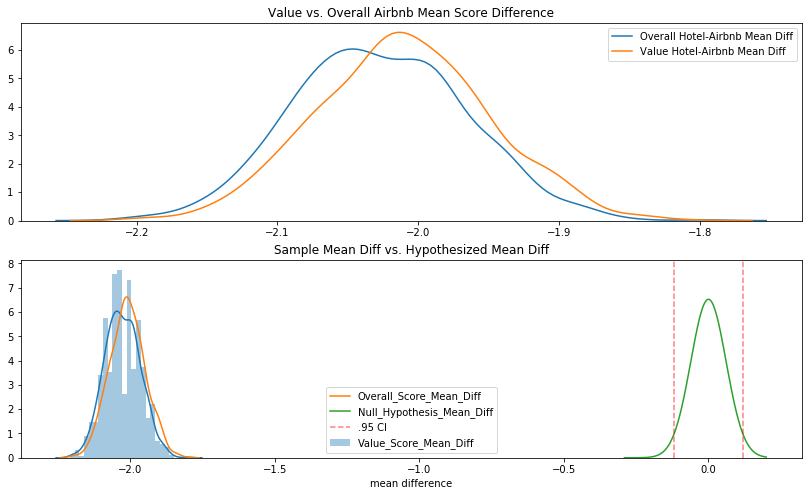

In [48]:
fig, ax = plt.subplots(2,figsize=(14,8))
normal_approx = stats.norm(0, np.std(sample_averages))

x1 = np.linspace(min(sample_averages),max(sample_averages),len(sample_averages))
x2 = np.linspace(min(value_averages),max(value_averages),len(value_averages))

sns.distplot(value_averages,bins=25,ax=ax[0],hist=False,label='Overall Hotel-Airbnb Mean Diff')
sns.distplot(sample_averages,bins=25,ax=ax[0],hist=False,label='Value Hotel-Airbnb Mean Diff')


sns.distplot(value_averages,bins=25,ax=ax[1],label='Value_Score_Mean_Diff')
sns.distplot(sample_averages,bins=25,ax=ax[1],label='Overall_Score_Mean_Diff',hist=False)
ax[0].set_title('Value vs. Overall Airbnb Mean Score Difference')

x = np.linspace(normal_approx.ppf(.000001), .2, num=1000)
ax[1].set_title('Sample Mean Diff vs. Hypothesized Mean Diff')
ax[1].set_xlabel('mean difference')
ax[1].plot(x,normal_approx.pdf(x),label='Null_Hypothesis_Mean_Diff')
ax[1].axvline(x=normal_approx.ppf(.025), color = 'red',alpha=.5,label='.95 CI',linestyle='--')
ax[1].axvline(x=normal_approx.ppf(.975), color = 'red',alpha=.5,linestyle='--')
ax[1].legend()
#normal_approx.pdf(x)

plt.show()

## PValue of Mean Difference = 0
## Null Hypothesis is Rejected

In [ ]:
os.chdir('/Users/ginariddle/Desktop/g.school/capstone')

In [49]:
count_total = hotels.shape[0]
sixty1 = hotels[hotels['word_count'] == 61]
pop_prop_61 = hotels['word_count'].value_counts().div(count_total).iloc[0]


In [50]:
airbnbs

,id,host_since,host_total_listings_count,property_type,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,combined_score
0,12899,2009-10-29,1.0,Guest suite,2010-01-24,4.90,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
1,16688,2009-12-21,1.0,House,2017-04-30,4.90,5.0,5.0,5.0,5.0,5.0,4.5,4.916667
2,29931,2010-02-10,3.0,House,2010-06-27,4.70,4.5,5.0,5.0,5.0,5.0,4.5,4.833333
3,37676,2010-07-09,2.0,Loft,2010-07-22,4.85,5.0,5.0,5.0,5.0,5.0,4.5,4.916667
4,39938,2010-07-18,3.0,House,2015-03-13,4.90,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
5,41601,2010-07-24,2.0,House,2010-08-09,4.85,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
6,42347,2010-07-29,1.0,House,2010-08-23,4.85,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
7,45890,2010-07-24,2.0,House,2011-06-26,4.85,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
8,53939,2010-08-19,2.0,House,2014-03-30,4.90,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
9,53940,2010-08-19,2.0,House,2015-05-12,5.00,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
